<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(1_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.053631,37.098219,33.230984,14.200342,163.583175,152.824752,10.758423
1,0.0,1.0,47.372503,59.710436,23.492986,-36.335957,104.239969,147.998276,-43.758307
2,0.0,2.0,45.784642,81.005723,59.066473,3.991580,199.848418,193.045279,6.803139
3,0.0,3.0,46.556544,47.235357,81.982452,-46.647514,139.126839,180.242618,-41.115779
4,0.0,4.0,64.503373,31.117262,31.255596,28.437030,165.313261,142.079042,23.234219
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.130985,98.131128,68.902877,-58.556071,147.608920,190.905656,-43.296737
19996,999.0,16.0,45.288932,64.980346,63.120347,-30.670351,152.719274,176.917501,-24.198228
19997,999.0,17.0,62.606657,25.422351,93.384537,12.528130,203.941676,199.842202,4.099473
19998,999.0,18.0,99.754055,89.265624,98.931361,33.333046,331.284085,330.020282,1.263803


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.053631,37.098219,33.230984,14.200342,163.583175,152.824752,10.758423
1,0.0,1.0,47.372503,59.710436,23.492986,-36.335957,104.239969,147.998276,-43.758307
2,0.0,2.0,45.784642,81.005723,59.066473,3.991580,199.848418,193.045279,6.803139
3,0.0,3.0,46.556544,47.235357,81.982452,-46.647514,139.126839,180.242618,-41.115779
4,0.0,4.0,64.503373,31.117262,31.255596,28.437030,165.313261,142.079042,23.234219
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.130985,98.131128,68.902877,-58.556071,147.608920,190.905656,-43.296737
19996,999.0,16.0,45.288932,64.980346,63.120347,-30.670351,152.719274,176.917501,-24.198228
19997,999.0,17.0,62.606657,25.422351,93.384537,12.528130,203.941676,199.842202,4.099473
19998,999.0,18.0,99.754055,89.265624,98.931361,33.333046,331.284085,330.020282,1.263803


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    69.053631  37.098219  33.230984  14.200342  163.583175   
      1.0    47.372503  59.710436  23.492986 -36.335957  104.239969   
      2.0    45.784642  81.005723  59.066473   3.991580  199.848418   
      3.0    46.556544  47.235357  81.982452 -46.647514  139.126839   
      4.0    64.503373  31.117262  31.255596  28.437030  165.313261   
...                ...        ...        ...        ...         ...   
999.0 15.0   29.130985  98.131128  68.902877 -58.556071  147.608920   
      16.0   45.288932  64.980346  63.120347 -30.670351  152.719274   
      17.0   62.606657  25.422351  93.384537  12.528130  203.941676   
      18.0   99.754055  89.265624  98.931361  33.333046  331.284085   
      19.0   84.768336  80.822147  74.332229  15.463212  265.385923   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    152.824752  10.758423  
      1.0    147.998276 -43.758307  
      2.0    193.045279   6.803139  
      3.0    180.242618 -41.115779  
      4.0    142.079042  23.234219  
...                 ...        ...  
999.0 15.0   190.905656 -43.296737  
      16.0   176.917501 -24.198228  
      17.0   199.842202   4.099473  
      18.0   330.020282   1.263803  
      19.0   269.155723  -3.769800  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    69.053631  37.098219  33.230984  14.200342  163.583175   
      1.0    47.372503  59.710436  23.492986 -36.335957  104.239969   
      2.0    45.784642  81.005723  59.066473   3.991580  199.848418   
      3.0    46.556544  47.235357  81.982452 -46.647514  139.126839   
      4.0    64.503373  31.117262  31.255596  28.437030  165.313261   
...                ...        ...        ...        ...         ...   
999.0 15.0   29.130985  98.131128  68.902877 -58.556071  147.608920   
      16.0   45.288932  64.980346  63.120347 -30.670351  152.719274   
      17.0   62.606657  25.422351  93.384537  12.528130  203.941676   
      18.0   99.754055  89.265624  98.931361  33.333046  331.284085   
      19.0   84.768336  80.822147  74.332229  15.463212  265.385923   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    152.824752  10.758423  
      1.0    147.998276 -43.758307  
      2.0    193.045279   6.803139  
      3.0    180.242618 -41.115779  
      4.0    142.079042  23.234219  
...                 ...        ...  
999.0 15.0   190.905656 -43.296737  
      16.0   176.917501 -24.198228  
      17.0   199.842202   4.099473  
      18.0   330.020282   1.263803  
      19.0   269.155723  -3.769800  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.053631,37.098219,33.230984,14.200342,163.583175,152.824752,10.758423
1,0.0,1.0,47.372503,59.710436,23.492986,-36.335957,104.239969,147.998276,-43.758307
2,0.0,2.0,45.784642,81.005723,59.066473,3.991580,199.848418,193.045279,6.803139
3,0.0,3.0,46.556544,47.235357,81.982452,-46.647514,139.126839,180.242618,-41.115779
4,0.0,4.0,64.503373,31.117262,31.255596,28.437030,165.313261,142.079042,23.234219
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.130985,98.131128,68.902877,-58.556071,147.608920,190.905656,-43.296737
19996,999.0,16.0,45.288932,64.980346,63.120347,-30.670351,152.719274,176.917501,-24.198228
19997,999.0,17.0,62.606657,25.422351,93.384537,12.528130,203.941676,199.842202,4.099473
19998,999.0,18.0,99.754055,89.265624,98.931361,33.333046,331.284085,330.020282,1.263803


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    69.053631  37.098219  33.230984  14.200342  163.583175   
      1.0    47.372503  59.710436  23.492986 -36.335957  104.239969   
      2.0    45.784642  81.005723  59.066473   3.991580  199.848418   
      3.0    46.556544  47.235357  81.982452 -46.647514  139.126839   
      4.0    64.503373  31.117262  31.255596  28.437030  165.313261   
...                ...        ...        ...        ...         ...   
999.0 15.0   29.130985  98.131128  68.902877 -58.556071  147.608920   
      16.0   45.288932  64.980346  63.120347 -30.670351  152.719274   
      17.0   62.606657  25.422351  93.384537  12.528130  203.941676   
      18.0   99.754055  89.265624  98.931361  33.333046  331.284085   
      19.0   84.768336  80.822147  74.332229  15.463212  265.385923   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    152.824752  10.758423  
      1.0    147.998276 -43.758307  
      2.0    193.045279   6.803139  
      3.0    180.242618 -41.115779  
      4.0    142.079042  23.234219  
...                 ...        ...  
999.0 15.0   190.905656 -43.296737  
      16.0   176.917501 -24.198228  
      17.0   199.842202   4.099473  
      18.0   330.020282   1.263803  
      19.0   269.155723  -3.769800  

[20000 rows x 7 columns]

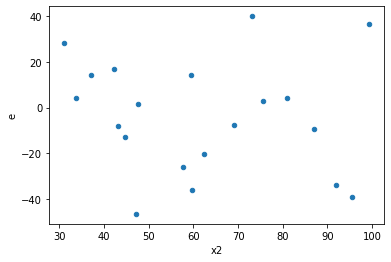

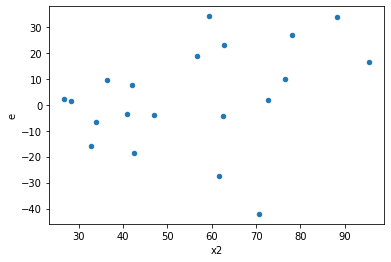

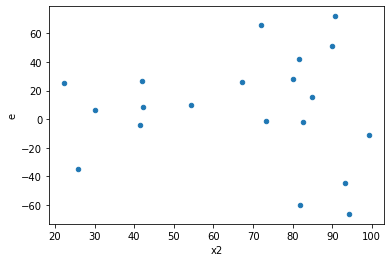

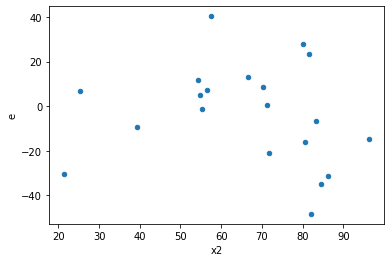

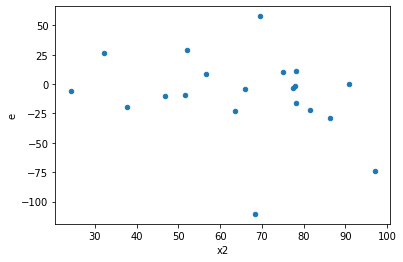

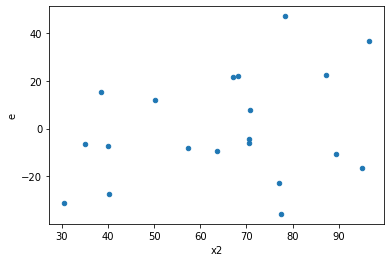

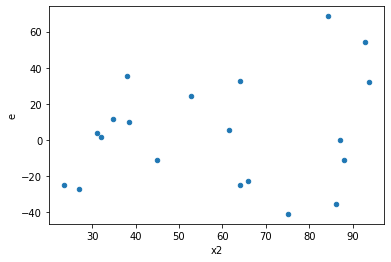

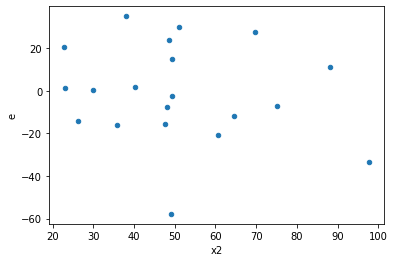

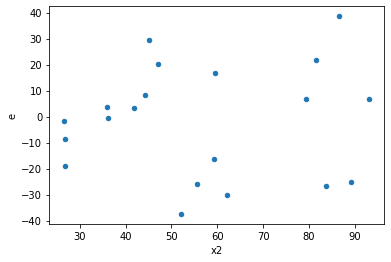

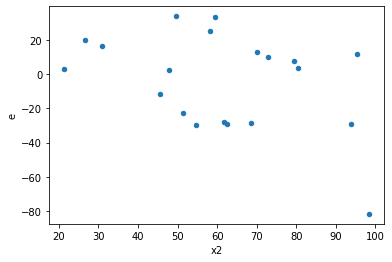

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,1863.3257193207799,3576.6055392697667,372.665143864156,715.3211078539533,1.9194741435617129,0.49145016679132936,0.7542749166043353,0.24572508339566468,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,420.54163596038455,3420.8591470479582,84.10832719207691,684.1718294095916,8.134412515982618,0.038140655072884666,0.9809296724635577,0.019070327536442333,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,4014.1426885310816,9793.907921148497,802.8285377062164,1958.7815842296993,2.4398504689758393,0.34997737357788483,0.8250113132110576,0.17498868678894242,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,3818.8138024083596,11684.899736278008,763.7627604816719,2336.9799472556015,3.0598244221566526,0.24510582169163597,0.877447089154182,0.12255291084581799,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,1459.4761090345721,2296.9841541843016,291.89522180691444,459.3968308368603,1.5738415586012793,0.6308423636514835,0.6845788181742583,0.31542118182574175,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,1107.0758211425807,2446.63802527309,221.41516422851615,489.327605054618,2.210000416004015,0.40455182113893917,0.7977240894305304,0.20227591056946959,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,2472.132689060748,5982.7300505585135,494.4265378121496,1196.5460101117028,2.4200683389820665,0.3542648498517045,0.8228675750741478,0.17713242492585224,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,1593.5328826879418,3564.0163768896864,318.7065765375884,712.8032753779373,2.2365502561064003,0.39768041425221123,0.8011597928738944,0.19884020712610562,Reject005=1 : Homoscedasticity
11.0,5.0,5.0,2056.966657572436,2167.4229831083107,411.39333151448716,433.48459662166215,1.0536986465625222,0.9556261604600405,0.5221869197699798,0.4778130802300202,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1863.3257193207799,3576.6055392697667,372.665143864156,715.3211078539533,1.9194741435617129,0.49145016679132936,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,420.54163596038455,3420.8591470479582,84.10832719207691,684.1718294095916,8.134412515982618,0.038140655072884666,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,4014.1426885310816,9793.907921148497,802.8285377062164,1958.7815842296993,2.4398504689758393,0.34997737357788483,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,1712.1065571617005,1631.7590743031049,342.4213114323401,326.35181486062095,0.9530709800026733,0.9592200270042716,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,3818.8138024083596,11684.899736278008,763.7627604816719,2336.9799472556015,3.0598244221566526,0.24510582169163597,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,1459.4761090345721,2296.9841541843016,291.89522180691444,459.3968308368603,1.5738415586012793,0.6308423636514835,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,1107.0758211425807,2446.63802527309,221.41516422851615,489.327605054618,2.210000416004015,0.40455182113893917,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,2472.132689060748,5982.7300505585135,494.4265378121496,1196.5460101117028,2.4200683389820665,0.3542648498517045,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,1593.5328826879418,3564.0163768896864,318.7065765375884,712.8032753779373,2.2365502561064003,0.39768041425221123,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      845
Reject005=0 : Heteroscedasticity    155
Name: Result_test, dtype: int64